In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [203]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [204]:
target_latency = 150

In [205]:
# local_df = pd.read_csv("../measurements/local_long/map.csv")
# root_folder = "../measurements/static_test_50/"
# mag_folder = "../measurements/real_bw_test_15fps/"

# local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
# root_folder = "../measurements_vidvrd/static_test_98/"
# mag_folder = "../measurements_vidvrd/test_ltl_15_1/"

local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
root_folder = "../measurements_bev/static_test_100/"
mag_folder = "../measurements_bev/test_ltl_15_1/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(root_folder+"characteristic.csv")
cha_df2= pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

cal_time = []
for i in range(len(tim_df)):
    if tim_df["technique"][i] == 2:
        cal_time.append(tim_df["compression_time"][i]/32)
    elif tim_df["technique"][i] == 3:
        cal_time.append(tim_df["compression_time"][i]-50)
    else:
        cal_time.append(tim_df["compression_time"][i])
tim_df["compression_time"] = cal_time

tim_df["transmission_time"] = cha_df["datasize_est"]*8/cha_df["consumed_bw"]*1000
tim_df["overall_est"] = tim_df["model_head_time"]*10+tim_df["model_tail_time"]+tim_df["framework_head_time"]+tim_df["framework_tail_time"] + tim_df["compression_time"]+tim_df["decompression_time"]+ tim_df["transmission_time"]

In [206]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [207]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [208]:
df["bandwidth"] = cha_df2["bandwidth"]
df["bw_com"] = cha_df["consumed_bw"]
df["overall_time"] = tim_df["overall_est"]

In [209]:
df = df[200:]

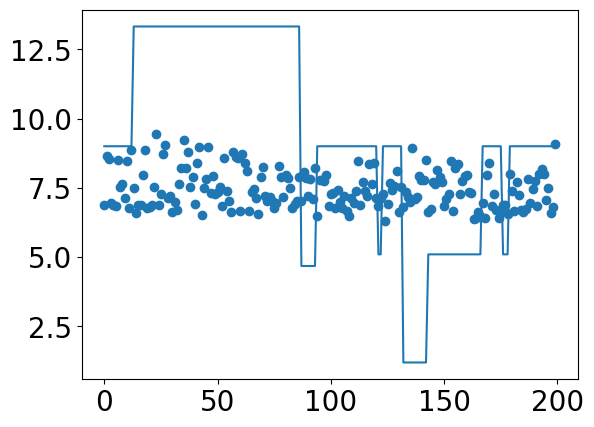

In [210]:
plt.plot(np.arange(200),df["bandwidth"]/1e6)
plt.scatter(np.arange(200), df["bw_com"]/1e6)

In [211]:
df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com,overall_time
200,0.4,0.000000,0.0,9000000.0,6.867529e+06,165.388489
201,0.4,-0.001530,0.0,9000000.0,8.657365e+06,165.888359
202,0.4,-0.000970,0.0,9000000.0,8.556706e+06,166.235054
203,0.4,-0.002747,0.0,9000000.0,6.953224e+06,165.529734
204,0.4,-0.001842,0.0,9000000.0,6.896753e+06,165.902767
...,...,...,...,...,...,...
395,0.4,0.000000,0.0,9000000.0,7.045835e+06,165.348488
396,0.4,0.000000,0.0,9000000.0,7.500424e+06,165.062600
397,0.4,0.000000,0.0,9000000.0,6.586871e+06,165.200557
398,0.4,0.000000,0.0,9000000.0,6.797365e+06,165.514472


In [212]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
# good_df= good_df[good_df["overall_time"]<target_latency]

In [213]:
len(good_df)/200

0.76